In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

In [2]:
data = pd.read_csv(r'F:\amruth\norm_price.csv', encoding = 'iso-8859-1')
data.sample(3)

,purchase_price_1,living_space_in_m2,number_of_rooms_1,floor_1,contruction_year_1,lat,lon,pickup cluster,Attikawohnungen,Dachgeschosswohnungen,...,Lofts,Maisonettes,Penthouse,RohdachbÃ¶den,Terrassenwohnungen,Wohnungen,terrasse_1,balkon_1,garten_1,Aufzug_1
25755,279000.0,68.156,2.8,1.0,1898,0.915525,0.232387,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19800,279000.0,85.000,3.0,1.0,1964,0.917588,0.232521,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10951,179000.0,32.000,1.0,5.0,1954,0.916437,0.232181,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27604 entries, 0 to 27603
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   purchase_price_1       27604 non-null  float64
 1   living_space_in_m2     27604 non-null  float64
 2   number_of_rooms_1      27604 non-null  float64
 3   floor_1                27604 non-null  float64
 4   contruction_year_1     27604 non-null  int64  
 5   lat                    27604 non-null  float64
 6   lon                    27604 non-null  float64
 7   pickup cluster         27604 non-null  int64  
 8   Attikawohnungen        27604 non-null  int64  
 9   Dachgeschosswohnungen  27604 non-null  int64  
 10  Erdgeschosswohnungen   27604 non-null  int64  
 11  Etagenwohnungen        27604 non-null  int64  
 12  Lofts                  27604 non-null  int64  
 13  Maisonettes            27604 non-null  int64  
 14  Penthouse              27604 non-null  int64  
 15  Ro

In [4]:
X = data.iloc[:, 1:]
y = data[['purchase_price_1']]
X.shape, y.shape

((27604, 21), (27604, 1))

In [5]:
XX = X.to_numpy()
yy = y.to_numpy()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 0)
X_train.shape, y_train.shape, X_test.shape

((27327, 21), (27327, 1), (277, 21))

In [7]:
tf.random.set_seed(20)
np.random.seed(1)
five_layer_model = tf.keras.models.Sequential()
five_layer_model.add(tf.keras.layers.Dense(600, activation='relu',input_dim=X.shape[1:][0]))
five_layer_model.add(tf.keras.layers.Dense(450,activation='relu'))
five_layer_model.add(tf.keras.layers.Dense(300,activation='relu'))
five_layer_model.add(tf.keras.layers.Dense(100,activation='relu'))
five_layer_model.add(tf.keras.layers.Dense(50,activation='relu'))
five_layer_model.add(tf.keras.layers.Dense(1))

five_layer_model.compile(loss='mse', optimizer='adam', 
                         metrics=['mae'])

In [8]:
history=five_layer_model.fit(X_train,y_train, validation_data = (X_test, y_test), epochs=50, batch_size = 32)
predictions = five_layer_model.predict(X_test)


Train on 27327 samples, validate on 277 samples
Epoch 1/50
27327/27327 [==============================] - 8s 299us/sample - loss: 32968155001.8124 - mae: 130572.6719 - val_loss: 11335616737.5018 - val_mae: 81580.7188
Epoch 2/50
27327/27327 [==============================] - 6s 233us/sample - loss: 17872518460.3394 - mae: 91175.3047 - val_loss: 10581833491.4079 - val_mae: 78743.8594
Epoch 3/50
27327/27327 [==============================] - 6s 234us/sample - loss: 16171266111.9274 - mae: 87130.7969 - val_loss: 10269009742.5560 - val_mae: 77004.6250
Epoch 4/50
27327/27327 [==============================] - 6s 232us/sample - loss: 13175428709.3808 - mae: 82264.5469 - val_loss: 10131395861.2563 - val_mae: 75968.7812
Epoch 5/50
27327/27327 [==============================] - 7s 253us/sample - loss: 12431859738.0618 - mae: 80488.3750 - val_loss: 10055869286.5848 - val_mae: 75364.5234
Epoch 6/50
27327/27327 [==============================] - 7s 243us/sample - loss: 12420801738.9114 - mae: 80586

In [10]:
five_layer_model.evaluate(X_train, y_train), five_layer_model.evaluate(X_test, y_test)

277/277 [==============================] - 0s 97us/sample - loss: 9464116911.5957 - mae: 72464.6328


([11472694590.700186, 76269.29], [9464116911.595669, 72464.63])

In [11]:
predictions[:5], y_test.to_numpy()[:5]

(array([[627156.2 ],
        [337804.7 ],
        [211145.03],
        [692210.  ],
        [575070.6 ]], dtype=float32),
 array([[632247.],
        [329000.],
        [514000.],
        [913541.],
        [548000.]]))

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(predictions, y_test), mean_absolute_error(predictions, y_test)

(9464116850.784664, 72464.63526173285)

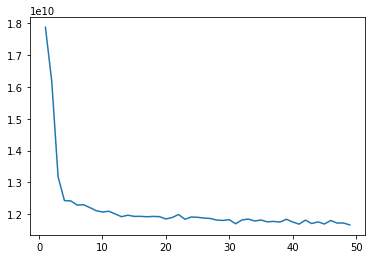

In [13]:
epochs = 50
plt.plot(range(1, len(history.history["loss"])), history.history["loss"][1:])

In [28]:
array = []
for i in data.columns[1:]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
#sq = float(input('cs'))
#array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
#sqr_living_m2 = two_dim[-1][0]
to = pd.DataFrame(two_dim)
five_layer_model.predict(to)

Enter the value of living_space_in_m2 : 58.93
Enter the value of number_of_rooms_1 : 2
Enter the value of floor_1 : 1
Enter the value of contruction_year_1 : 2000
Enter the value of lat : 0.9151
Enter the value of lon : 0.2364
Enter the value of pickup cluster : 0
Enter the value of Attikawohnungen  : 0
Enter the value of Dachgeschosswohnungen : 0
Enter the value of Erdgeschosswohnungen : 0
Enter the value of Etagenwohnungen : 1
Enter the value of Lofts : 0
Enter the value of Maisonettes : 0
Enter the value of Penthouse : 0
Enter the value of RohdachbÃ¶den : 0
Enter the value of Terrassenwohnungen : 0
Enter the value of Wohnungen : 0
Enter the value of terrasse_1 : 1
Enter the value of balkon_1 : 1
Enter the value of garten_1 : 0
Enter the value of Aufzug_1 : 1


array([[319362.12]], dtype=float32)

In [29]:
array = []
for i in data.columns[1:]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
#sq = float(input('cs'))
#array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
#sqr_living_m2 = two_dim[-1][0]
to = pd.DataFrame(two_dim)
five_layer_model.predict(to)

Enter the value of living_space_in_m2 : 58.93
Enter the value of number_of_rooms_1 : 2
Enter the value of floor_1 : 1
Enter the value of contruction_year_1 : 2000
Enter the value of lat : 0.91685
Enter the value of lon : 0.23361
Enter the value of pickup cluster : 0
Enter the value of Attikawohnungen  : 0
Enter the value of Dachgeschosswohnungen : 0
Enter the value of Erdgeschosswohnungen : 0
Enter the value of Etagenwohnungen : 1
Enter the value of Lofts : 0
Enter the value of Maisonettes : 0
Enter the value of Penthouse : 0
Enter the value of RohdachbÃ¶den : 0
Enter the value of Terrassenwohnungen : 0
Enter the value of Wohnungen : 0
Enter the value of terrasse_1 : 1
Enter the value of balkon_1 : 1
Enter the value of garten_1 : 0
Enter the value of Aufzug_1 : 1


array([[319360.78]], dtype=float32)

In [30]:
array = []
for i in data.columns[1:]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
#sq = float(input('cs'))
#array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
#sqr_living_m2 = two_dim[-1][0]
to = pd.DataFrame(two_dim)
five_layer_model.predict(to)

Enter the value of living_space_in_m2 : 58.93
Enter the value of number_of_rooms_1 : 2
Enter the value of floor_1 : 1
Enter the value of contruction_year_1 : 2000
Enter the value of lat : 0.9171356153379803
Enter the value of lon : 0.236696317167715
Enter the value of pickup cluster : 0
Enter the value of Attikawohnungen  : 0
Enter the value of Dachgeschosswohnungen : 0
Enter the value of Erdgeschosswohnungen : 0
Enter the value of Etagenwohnungen : 1
Enter the value of Lofts : 0
Enter the value of Maisonettes : 0
Enter the value of Penthouse : 0
Enter the value of RohdachbÃ¶den : 0
Enter the value of Terrassenwohnungen : 0
Enter the value of Wohnungen : 0
Enter the value of terrasse_1 : 1
Enter the value of balkon_1 : 1
Enter the value of garten_1 : 0
Enter the value of Aufzug_1 : 1


array([[319359.62]], dtype=float32)

In [33]:
array = []
for i in data.columns[1:]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
#sq = float(input('cs'))
#array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
#sqr_living_m2 = two_dim[-1][0]
to = pd.DataFrame(two_dim)
five_layer_model.predict(to)

Enter the value of living_space_in_m2 : 36.14
Enter the value of number_of_rooms_1 : 1
Enter the value of floor_1 : 3
Enter the value of contruction_year_1 : 1969
Enter the value of lat : 0.9152960383063783
Enter the value of lon : 0.23230855942820125
Enter the value of pickup cluster : 0
Enter the value of Attikawohnungen  : 0
Enter the value of Dachgeschosswohnungen : 0
Enter the value of Erdgeschosswohnungen : 0
Enter the value of Etagenwohnungen : 1
Enter the value of Lofts : 0
Enter the value of Maisonettes : 0
Enter the value of Penthouse : 0
Enter the value of RohdachbÃ¶den : 0
Enter the value of Terrassenwohnungen : 0
Enter the value of Wohnungen : 0
Enter the value of terrasse_1 : 0
Enter the value of balkon_1 : 1
Enter the value of garten_1 : 1
Enter the value of Aufzug_1 : 1


array([[230122.52]], dtype=float32)

In [34]:
array = []
for i in data.columns[1:]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
#sq = float(input('cs'))
#array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
#sqr_living_m2 = two_dim[-1][0]
to = pd.DataFrame(two_dim)
five_layer_model.predict(to)

Enter the value of living_space_in_m2 : 36.14
Enter the value of number_of_rooms_1 : 1
Enter the value of floor_1 : 3
Enter the value of contruction_year_1 : 1969
Enter the value of lat : 0.9152960383063783
Enter the value of lon : 0.23230855942820125
Enter the value of pickup cluster : 0
Enter the value of Attikawohnungen  : 0
Enter the value of Dachgeschosswohnungen : 0
Enter the value of Erdgeschosswohnungen : 0
Enter the value of Etagenwohnungen : 0
Enter the value of Lofts : 0
Enter the value of Maisonettes : 0
Enter the value of Penthouse : 0
Enter the value of RohdachbÃ¶den : 0
Enter the value of Terrassenwohnungen : 0
Enter the value of Wohnungen : 1
Enter the value of terrasse_1 : 0
Enter the value of balkon_1 : 1
Enter the value of garten_1 : 0
Enter the value of Aufzug_1 : 1


array([[218307.81]], dtype=float32)

In [35]:
array = []
for i in data.columns[1:]:
    value = float(input('Enter the value of {} : '.format(i)))
    array.append(value)
#sq = float(input('cs'))
#array.append(np.log1p(sq))
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
#sqr_living_m2 = two_dim[-1][0]
to = pd.DataFrame(two_dim)
five_layer_model.predict(to)

Enter the value of living_space_in_m2 : 90
Enter the value of number_of_rooms_1 : 3
Enter the value of floor_1 : 1
Enter the value of contruction_year_1 : 1905
Enter the value of lat : 0.9173153842509357
Enter the value of lon : 0.23229983278194127
Enter the value of pickup cluster : 0
Enter the value of Attikawohnungen  : 0
Enter the value of Dachgeschosswohnungen : 0
Enter the value of Erdgeschosswohnungen : 0
Enter the value of Etagenwohnungen : 0
Enter the value of Lofts : 0
Enter the value of Maisonettes : 0
Enter the value of Penthouse : 0
Enter the value of RohdachbÃ¶den : 0
Enter the value of Terrassenwohnungen : 0
Enter the value of Wohnungen : 1
Enter the value of terrasse_1 : 0
Enter the value of balkon_1 : 1
Enter the value of garten_1 : 0
Enter the value of Aufzug_1 : 0


array([[440445.44]], dtype=float32)

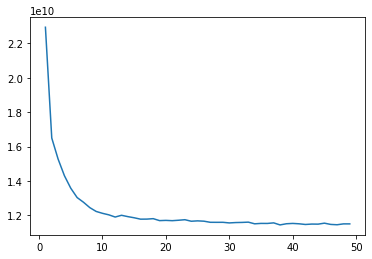

In [10]:
epochs = 50
plt.plot(range(1, len(history.history["loss"])), history.history["loss"][1:])